# Spam / Ham Assignment 5 

### Roll no: MIT2018020

1. Using Naive Bayesian classifier predict where a given mail is spam or not. Use the data
    set provided for this purpose. ( structured data set)
    
### Steps to be included: <br>
1. Preprocess the data. <br>
    a) Remove repeated entries if exists <br>
    b) Remove punctuation <br>
    c) Remove not relevant special characters <br> 
    d) Obtain a list of clean text words <br>

2. Split train and test dataset <br>
3. Create the model (convert strings to integer counts, obtain frequency of the words and create the model using Naïve Bayes formula). <br>
4. Test the model. <br>
5. Create a confusion matrix on your prediction for test dataset. <br>
6. Make analysis report for your model and results.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.metrics import confusion_matrix

In [2]:
np.random.seed(3)
data = pd.read_csv('spam.csv',encoding='latin-1',names=["is_spam","message",'1','2','3']).iloc[1:,:2]
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,is_spam,message
0,ham,I WILL CAL YOU SIR. In meeting
1,spam,"Loan for any purpose å£500 - å£75,000. Homeown..."
2,ham,LOOK AT THE FUCKIN TIME. WHAT THE FUCK YOU THI...
3,ham,Ever green quote ever told by Jerry in cartoon...
4,ham,Wat time Ì_ finish?


## Preprocessing

In [3]:
data.iloc[:,0] = (data.iloc[:,0] == 'spam').astype(np.int)
data.head()

,is_spam,message
0,0,I WILL CAL YOU SIR. In meeting
1,1,"Loan for any purpose å£500 - å£75,000. Homeown..."
2,0,LOOK AT THE FUCKIN TIME. WHAT THE FUCK YOU THI...
3,0,Ever green quote ever told by Jerry in cartoon...
4,0,Wat time Ì_ finish?


In [4]:
data.shape

(5572, 2)

In [5]:
data.drop_duplicates(inplace=True)

In [6]:
data.shape

(5169, 2)

In [7]:
data.head()

,is_spam,message
0,0,I WILL CAL YOU SIR. In meeting
1,1,"Loan for any purpose å£500 - å£75,000. Homeown..."
2,0,LOOK AT THE FUCKIN TIME. WHAT THE FUCK YOU THI...
3,0,Ever green quote ever told by Jerry in cartoon...
4,0,Wat time Ì_ finish?


In [8]:
unwanted = stopwords.words('english') + list(string.punctuation)
'HELLO'.lower(), unwanted[:5] 

('hello', ['i', 'me', 'my', 'myself', 'we'])

In [9]:
for i,row in enumerate(data.iloc[:,1]):
    temp = []
    for w in word_tokenize(row.lower()):
        if (w not in unwanted) and (len(w) > 2):
            temp.append(w)
    data.iloc[i,1] = ' '.join(temp)
data.head()

,is_spam,message
0,0,cal sir meeting
1,1,"loan purpose å£500 å£75,000 homeowners tenants..."
2,0,look fuckin time fuck think
3,0,ever green quote ever told jerry cartoon perso...
4,0,wat time finish


In [10]:
data.groupby('is_spam')['message'].apply(' '.join).reset_index()

,is_spam,message
0,0,cal sir meeting look fuckin time fuck think ev...
1,1,"loan purpose å£500 å£75,000 homeowners tenants..."


In [11]:
data.head()

,is_spam,message
0,0,cal sir meeting
1,1,"loan purpose å£500 å£75,000 homeowners tenants..."
2,0,look fuckin time fuck think
3,0,ever green quote ever told jerry cartoon perso...
4,0,wat time finish


## Test train split 70 - 30

In [12]:
t = int(data.shape[0] * 0.7)
d_train = data[:t]
d_test = data[t:]

## Training

In [13]:
def train(data, alpha=1):
    vocab = []
    freq_ham = {}
    ham_count = 0.0
    spam_count = 0.0
    freq_spam = {}
    
    for i,row in enumerate(data.iloc[:,1]):
        for w in word_tokenize(row.lower()):
            if w not in vocab:
                vocab.append(w)
                freq_ham[w] = alpha  # Smoothing
                freq_spam[w] = alpha # Smoothing
            if data.iloc[i,0] == 1:
                freq_spam[w] += 1
                spam_count += 1
            else:
                freq_ham[w] += 1
                ham_count +=1
    V = len(vocab)
    p_given_ham = {}
    p_given_spam = {}
    p_spam = spam_count / (spam_count + ham_count)
    p_ham = ham_count / (spam_count + ham_count)
    for w in vocab:
        p_given_ham[w] = freq_ham[w] / (ham_count + V * alpha)
        p_given_spam[w] = freq_spam[w] / (spam_count + V * alpha)
    P = {'spam':p_spam, 'ham':p_ham, 'given_ham':p_given_ham, 'given_spam': p_given_spam}
    freq = {'ham':freq_ham, 'hams': ham_count, 'spams':spam_count, 'spam':freq_spam, 'V':V}
    
    return P, freq, vocab

In [14]:
P, freq, vocab = train(d_train)
P['spam'], P['ham']
freq['ham']

{'cal': 6,
 'sir': 22,
 'meeting': 28,
 'loan': 6,
 'purpose': 1,
 'å£500': 1,
 'å£75,000': 1,
 'homeowners': 1,
 'tenants': 1,
 'welcome': 4,
 'previously': 1,
 'refused': 1,
 'still': 107,
 'help': 23,
 'call': 133,
 'free': 37,
 '0800': 1,
 '1956669': 1,
 'text': 49,
 'back': 93,
 "'help": 1,
 'look': 18,
 'fuckin': 3,
 'time': 134,
 'fuck': 23,
 'think': 80,
 'ever': 20,
 'green': 4,
 'quote': 3,
 'told': 39,
 'jerry': 2,
 'cartoon': 3,
 'person': 25,
 'irritates': 2,
 'always': 37,
 'one': 116,
 'loves': 7,
 'vry': 4,
 'much': 73,
 'fails': 2,
 'express': 3,
 '...': 804,
 'gud': 28,
 'nyt': 4,
 'wat': 68,
 'finish': 31,
 'aight': 26,
 'plan': 25,
 'come': 140,
 'later': 75,
 'tonight': 44,
 'knock': 1,
 'txt': 9,
 'whose': 1,
 '80082': 1,
 'enter': 2,
 'weekly': 1,
 'draw': 4,
 'å£250': 1,
 'gift': 5,
 'voucher': 1,
 'store': 2,
 'choice': 3,
 'www.tkls.com': 1,
 'age16': 1,
 'stoptxtstopå£1.50/week': 1,
 'took': 12,
 'hooch': 2,
 'walk': 6,
 'toaday': 2,
 'fell': 3,
 'splat': 2,


In [15]:
P, freq, vocab = train(d_train,alpha=0)
P['spam'], P['ham']
freq['ham']

{'cal': 5,
 'sir': 21,
 'meeting': 27,
 'loan': 5,
 'purpose': 0,
 'å£500': 0,
 'å£75,000': 0,
 'homeowners': 0,
 'tenants': 0,
 'welcome': 3,
 'previously': 0,
 'refused': 0,
 'still': 106,
 'help': 22,
 'call': 132,
 'free': 36,
 '0800': 0,
 '1956669': 0,
 'text': 48,
 'back': 92,
 "'help": 0,
 'look': 17,
 'fuckin': 2,
 'time': 133,
 'fuck': 22,
 'think': 79,
 'ever': 19,
 'green': 3,
 'quote': 2,
 'told': 38,
 'jerry': 1,
 'cartoon': 2,
 'person': 24,
 'irritates': 1,
 'always': 36,
 'one': 115,
 'loves': 6,
 'vry': 3,
 'much': 72,
 'fails': 1,
 'express': 2,
 '...': 803,
 'gud': 27,
 'nyt': 3,
 'wat': 67,
 'finish': 30,
 'aight': 25,
 'plan': 24,
 'come': 139,
 'later': 74,
 'tonight': 43,
 'knock': 0,
 'txt': 8,
 'whose': 0,
 '80082': 0,
 'enter': 1,
 'weekly': 0,
 'draw': 3,
 'å£250': 0,
 'gift': 4,
 'voucher': 0,
 'store': 1,
 'choice': 2,
 'www.tkls.com': 0,
 'age16': 0,
 'stoptxtstopå£1.50/week': 0,
 'took': 11,
 'hooch': 1,
 'walk': 5,
 'toaday': 1,
 'fell': 2,
 'splat': 1,


## Bayes Rule for taking the decision

### If $P(Ham | w_1) > P(Spam | w_1) $ <br> then <br>  $\;\;\;\;\;\;$ $Ham$ <br> else  <br> $\;\;\;\;\;\;$    $Spam$
### $P(Spam | w_1) = \frac{P(w_1 | Spam) x P(Spam)}{P(w_1)} $ <br>
### $P(Ham | w_1) = \frac{P(w_1 | Ham) x P(Ham)}{P(w_1)} $

Here $P(w_1) $ in denominator is common for computing both probablities, so it is not required for the decision

In [16]:
def predict_spam(mails, P, vocab, alpha=1):
    h = []
    for mail in mails:
        p_ham = P['ham']
        p_spam = P['spam']
        for w in word_tokenize(mail.lower()):
            if w in vocab:
                p_ham *= P['given_ham'][w]
                p_spam *= P['given_spam'][w]
            elif alpha > 0 :
                p_ham *= alpha/(freq['hams']+ freq['V']  + alpha)    # Smoothing for unseen word
                p_spam *= alpha/(freq['spams'] + freq['V'] + alpha)  # Smoothing for unseen word
        if p_spam > p_ham:
            h.append(1)
        else:
            h.append(0)
    return np.array(h)

In [17]:
def accuracy(data, P, vocab, alpha =1) :
    h = predict_spam(data.iloc[:,1], P, vocab, alpha)
    y = np.array(data.iloc[:,0])
    cm = confusion_matrix(y,h)
    plot_cm(cm)
    print("\nTotal Ham:" + str(np.where(y == 0)[0].shape[0]))
    print("Total Spam:" + str(np.where(y == 1)[0].shape[0]))
    
    print("\nPredicted Ham:" + str(np.where(h == 0)[0].shape[0]))
    print("Predicted Spam:" + str(np.where(h == 1)[0].shape[0]))
    
    error = np.abs(h - y).sum()
    return (1 - error / data.shape[0] )* 100

### Ploting Function

Ref: https://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/

In [18]:
def plot_cm(cm):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative (Ham)','Positive (Spam)']
    plt.title('Spam or Not Spam Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

## With Laplace Smoothing $\alpha$ = 1

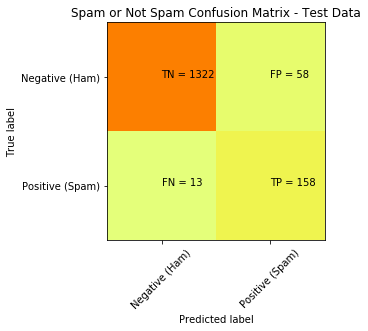


Total Ham:1380
Total Spam:171

Predicted Ham:1335
Predicted Spam:216


95.42230818826563

In [19]:
P, freq, vocab = train(d_train,alpha=1)
accuracy(d_test, P, vocab,alpha=1)

## Without Laplace Smoothing $\alpha$ = 0

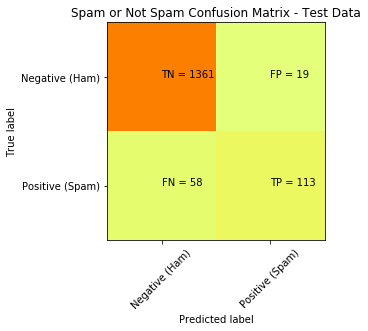


Total Ham:1380
Total Spam:171

Predicted Ham:1419
Predicted Spam:132


95.0354609929078

In [20]:
P, freq, vocab = train(d_train,alpha=0)
accuracy(d_test, P, vocab,alpha=0)